<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/CopaSudamericanaStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the search parameters
filename = 'conmebol-competitions-finals.xlsx'
search_path = '/content/drive/My Drive/Datasets/Soccer'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [3]:
# Importing the dataset:
conmebol_competitions = pd.ExcelFile(file)
sud = pd.read_excel(conmebol_competitions, 'Copa Sudamericana finals')

# Displaying the last 5 champions:
sud.tail()

,Season,Winners country,Winner,Score (1st game),Score (2nd game),Runner-up,Runners-up country,Venue (1st game),Host city (1st game),Host country (1st game),Venue (2nd game),Host city (2nd game),Host city (3rd game),Attendance (1st game),Attendance (2nd game),How the game was won,Finalists came from Libertadores
18,2020,Argentina,Defensa y Justicia,3–0,NaN,Lanús,Argentina,Estadio Mario Alberto Kempes,Córdoba,Colombia,NaN,NaN,NaN,0.0,0.0,Regular time,Winners
19,2021,Brazil,Athletico Paranaense,1–0,NaN,Red Bull Bragantino,Brazil,Estadio Centenario,Montevideo,Uruguay,NaN,NaN,NaN,20000.0,0.0,Regular time,NaN
20,2022,Ecuador,Independiente del Valle,2–0,NaN,São Paulo,Brazil,Estadio Mario Alberto Kempes,Córdoba,Colombia,NaN,NaN,NaN,24683.0,0.0,Regular time,Winners
21,2023,Ecuador,LDU Quito,1–1,NaN,Fortaleza,Brazil,Estadio Domingo Burgueño,Maldonado,Chile,NaN,NaN,NaN,NaN,0.0,Penalty shootout,NaN
22,2024,Argentina,Racing Club,3–1,NaN,Cruzeiro,Brazil,Estadio General Pablo Rojas,Asunción,Paraguay,NaN,NaN,NaN,43828.0,0.0,Regular time,NaN


In [4]:
# Displaying the number of rows and columns in the dataset:
sud.shape

(23, 17)

In [5]:
# Displaying the datatypes presented in the columns:
sud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Season                            23 non-null     int64  
 1   Winners country                   23 non-null     object 
 2   Winner                            23 non-null     object 
 3   Score (1st game)                  22 non-null     object 
 4   Score (2nd game)                  16 non-null     object 
 5   Runner-up                         23 non-null     object 
 6   Runners-up country                23 non-null     object 
 7   Venue (1st game)                  23 non-null     object 
 8   Host city (1st game)              23 non-null     object 
 9   Host country (1st game)           23 non-null     object 
 10  Venue (2nd game)                  17 non-null     object 
 11  Host city (2nd game)              17 non-null     object 
 12  Host city 

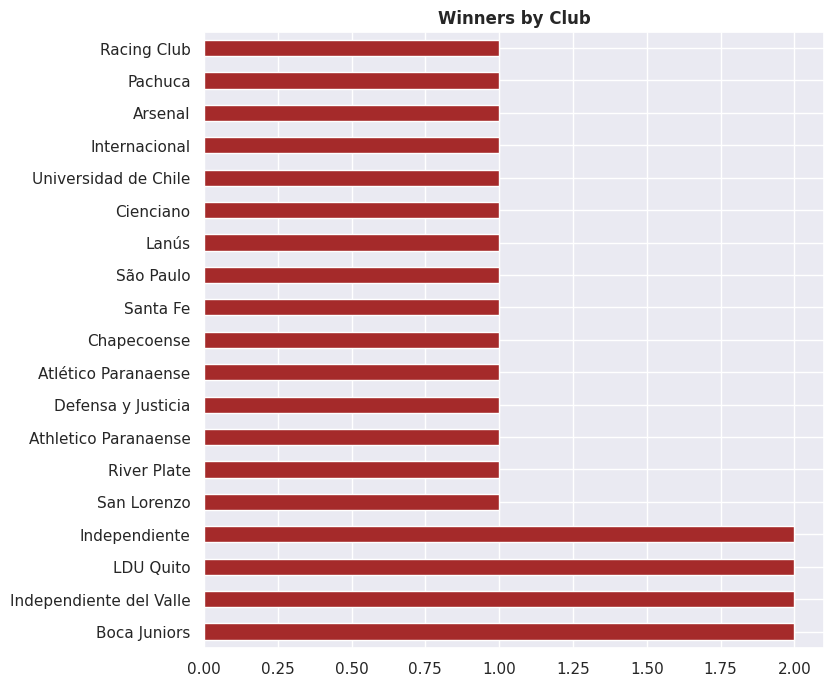

In [7]:
# Displaying number of titles by club:
sud.groupby('Season').first()['Winner'].value_counts().plot(kind = 'barh', color = 'brown', figsize = (8, 8))
plt.ylabel(None)
plt.title('Winners by Club', fontweight = 'bold')
plt.show()

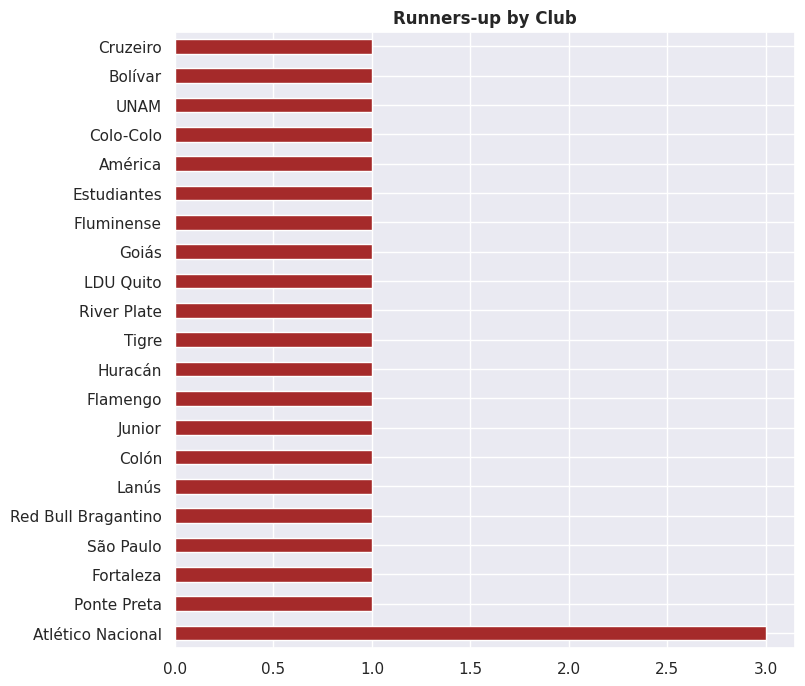

In [9]:
# Displaying number of runners-up by club:
sud.groupby('Season').first()['Runner-up'].value_counts().plot(kind = 'barh', color = 'brown', figsize = (8, 8))
plt.ylabel(None)
plt.title('Runners-up by Club', fontweight = 'bold')
plt.show()

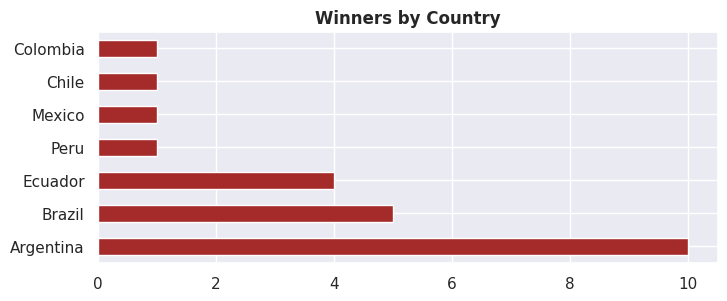

In [12]:
# Displaying number of titles by country:
sud.groupby('Season').first()['Winners country'].value_counts().plot(kind = 'barh', color = 'brown', figsize = (8, 3))
plt.ylabel(None)
plt.title('Winners by Country', fontweight = 'bold')
plt.show()

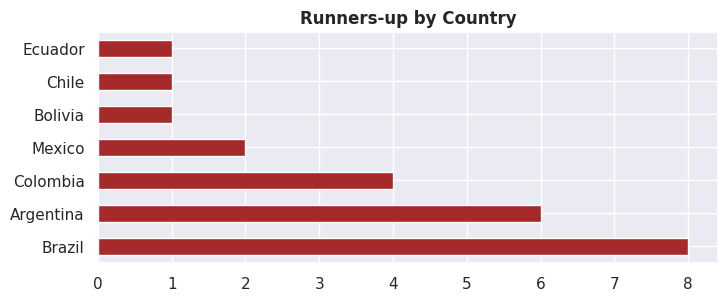

In [14]:
# Displaying number of runners-up by country:
sud.groupby('Season').first()['Runners-up country'].value_counts().plot(kind = 'barh', color = 'brown', figsize = (8, 3))
plt.ylabel(None)
plt.title('Runners-up by Country', fontweight = 'bold')
plt.show()

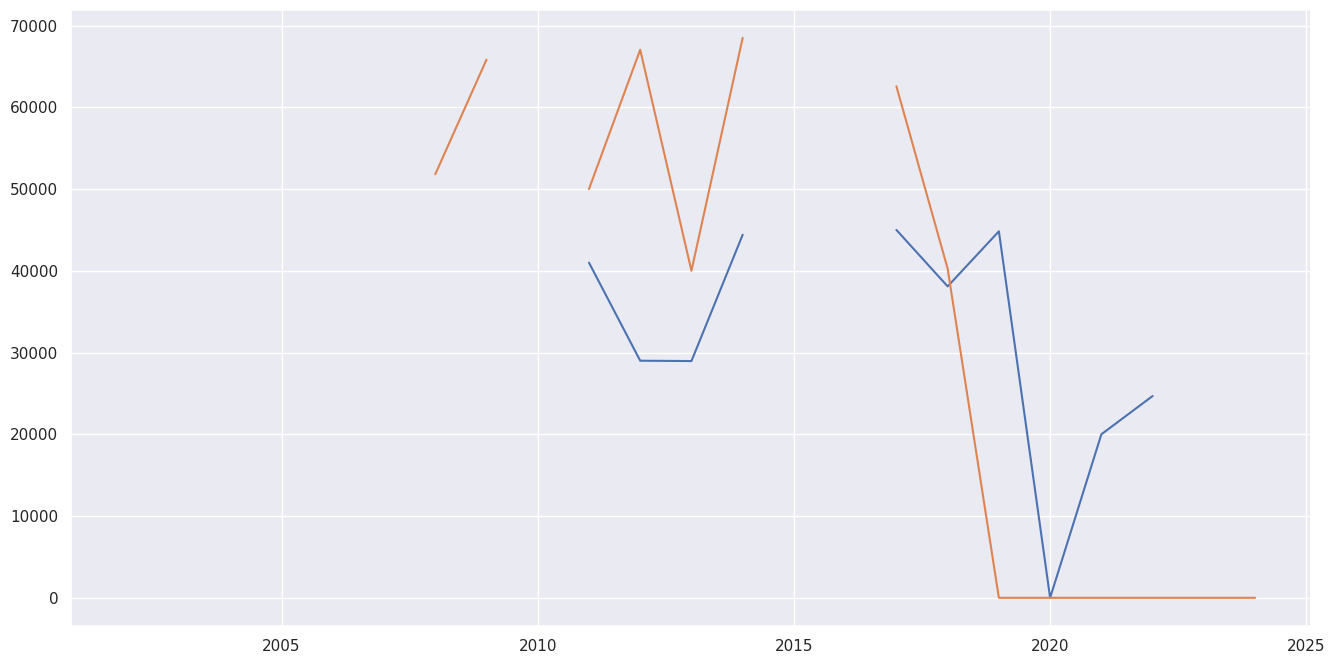

In [15]:
# Displaying the attendances of the 1st and 2nd leg matches by season:
plt.figure(figsize = (16, 8))
plt.plot(sud['Season'], sud['Attendance (1st game)'])
plt.plot(sud['Season'], sud['Attendance (2nd game)'])

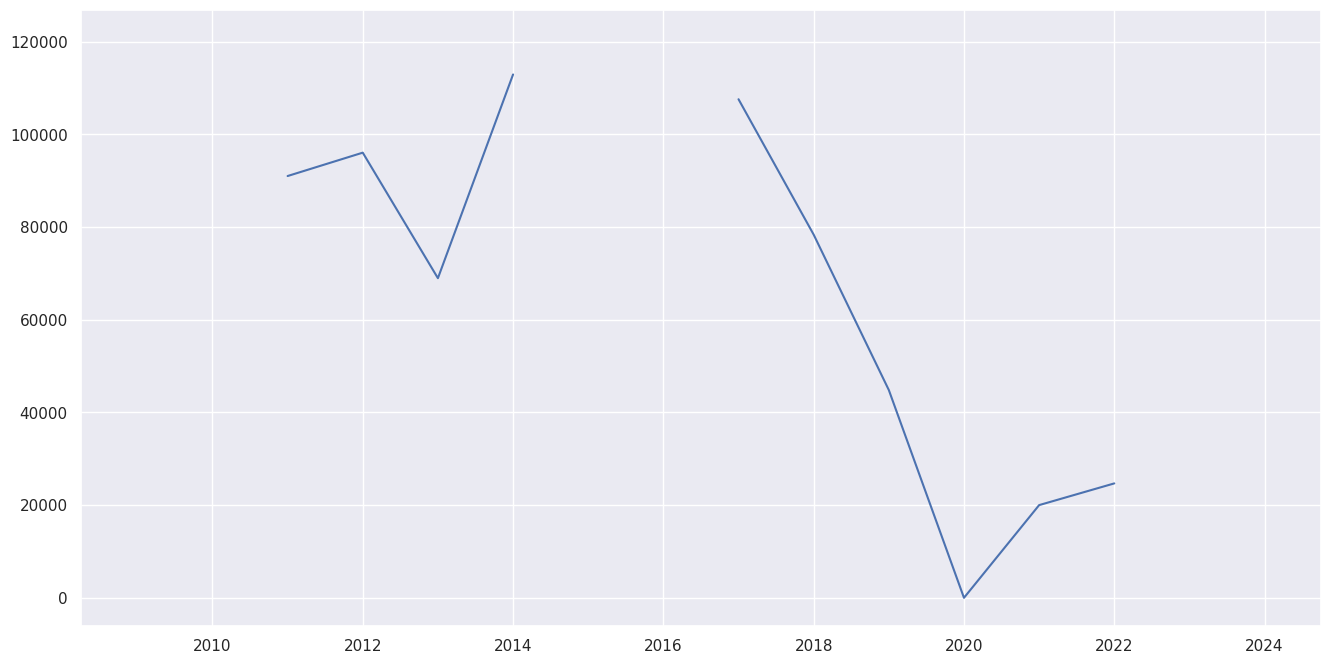

In [16]:
# Displaying the total attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (16, 8))
plt.plot(sud['Season'], sud['Attendance (1st game)'] + sud['Attendance (2nd game)'])

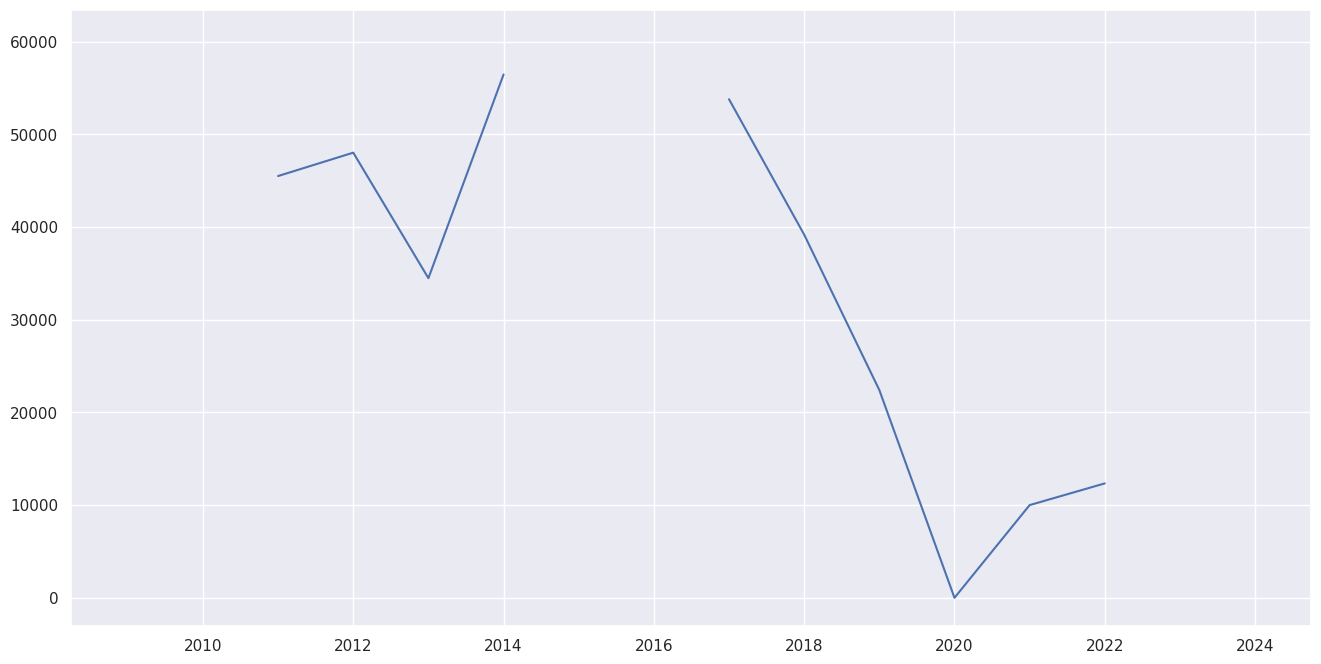

In [17]:
# Displaying the average attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (16, 8))
plt.plot(sud['Season'], (sud['Attendance (1st game)'] + sud['Attendance (2nd game)']) / 2)